In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import ipywidgets as widgets

In [2]:
mask_features = pd.read_csv("/Users/onurserce/MPIB/20240125_MPIB_15um/mask_features_regions_dedup", sep=";", on_bad_lines='warn')
mask_features.head()

/var/folders/jv/6pxghqhs63j4kg1d6f8brh2r0000gn/T/ipykernel_99211/2677643162.py:1: ParserWarning: Skipping line 47805: expected 231 fields, saw 366

  mask_features = pd.read_csv("/Users/onurserce/MPIB/20240125_MPIB_15um/mask_features_regions_dedup", sep=";", on_bad_lines='warn')
/var/folders/jv/6pxghqhs63j4kg1d6f8brh2r0000gn/T/ipykernel_99211/2677643162.py:1: ParserWarning: Skipping line 194397: expected 231 fields, saw 302

  mask_features = pd.read_csv("/Users/onurserce/MPIB/20240125_MPIB_15um/mask_features_regions_dedup", sep=";", on_bad_lines='warn')
/var/folders/jv/6pxghqhs63j4kg1d6f8brh2r0000gn/T/ipykernel_99211/2677643162.py:1: ParserWarning: Skipping line 219080: expected 231 fields, saw 344

  mask_features = pd.read_csv("/Users/onurserce/MPIB/20240125_MPIB_15um/mask_features_regions_dedup", sep=";", on_bad_lines='warn')
/var/folders/jv/6pxghqhs63j4kg1d6f8brh2r0000gn/T/ipykernel_99211/2677643162.py:1: ParserWarning: Skipping line 382828: expected 231 fields, saw 283

  mask_fe

,il id,series,path,name,type,plate,well,well_row,well_column,timepoint,...,CELL WINDOWED-INTENSITY-MIN SYTOG.1,CELL WINDOWED-INTENSITY-STDDEV AF555.1,CELL WINDOWED-INTENSITY-STDDEV AF647.1,CELL WINDOWED-INTENSITY-STDDEV SYTOG.1,REGION COMBINED Region 1.1,REGION COMBINED Region 4.1,REGION COMBINED Region 5.1,REGION COMBINED Region 2.1,REGION COMBINED Region 3.1,Unnamed: 230
0,1,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m20_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.072043,0.013090,-0.002525,0.193304,0.0,0.0,1.0,0.0,0.0,NaN
1,1,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m20_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.213577,0.004489,-0.018174,0.018469,0.0,0.0,1.0,0.0,0.0,NaN
2,1,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m20_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.118465,0.008339,0.002494,0.067541,0.0,0.0,1.0,0.0,0.0,NaN
3,1,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m20_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.129054,0.019876,0.012955,0.173649,0.0,0.0,1.0,0.0,0.0,NaN
4,1,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m20_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.114021,0.017269,0.008782,0.266945,0.0,0.0,1.0,0.0,0.0,NaN


## Cleaning and seperating the data per region

In [3]:
print(f"shape is {mask_features.shape} but the data contains duplicate columns")

shape is (388597, 231) but the data contains duplicate columns


In [4]:
# Drop duplicate columns

dup_cols = []

for col in mask_features.columns:
    if col.endswith(".1"):
        dup_cols.append(col)

# Drop it like it's hot!
mask_features.drop(dup_cols, axis=1, inplace=True)

print(f"shape is {mask_features.shape} after dropping duplicate columns")
mask_features.head()

shape is (388597, 124) after dropping duplicate columns


,il id,series,path,name,type,plate,well,well_row,well_column,timepoint,...,CELL WINDOWED-INTENSITY-STDDEV AF647,CELL WINDOWED-INTENSITY-STDDEV SYTOG,REGION COMBINED Region 1,REGION COMBINED Region 4,REGION COMBINED Region 5,REGION COMBINED Region 2,REGION COMBINED Region 3,rowid,il id.2,Unnamed: 230
0,1,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m20_c0_z1_l1_o0,items,1,A1,1,1,1,...,-0.002525,0.193304,0,0.0,1.0,0,0.0,1.0,1.0,NaN
1,1,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m20_c0_z1_l1_o0,items,1,A1,1,1,1,...,-0.018174,0.018469,0,0.0,1.0,0,0.0,2.0,1.0,NaN
2,1,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m20_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.002494,0.067541,0,0.0,1.0,0,0.0,3.0,1.0,NaN
3,1,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m20_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.012955,0.173649,0,0.0,1.0,0,0.0,4.0,1.0,NaN
4,1,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m20_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.008782,0.266945,0,0.0,1.0,0,0.0,5.0,1.0,NaN


In [ ]:
# Save data from each region into seperate csv files
 
for col in mask_features.columns:
    if col.startswith("REGION COMBINED"):
        region = "_".join(col.split(" ")[-2:])
        subdf = mask_features.loc[mask_features.loc[:, col] == True, :]
        subdf.to_csv("/Users/onurserce/MPIB/20240125_MPIB_15um/mask_features_regions_dedup" + "_" + region + ".csv", sep=",")

##  Filtering

Following filtering and analysis will be done with only a single region (brain section).

### Region 3

In [5]:
# Continue with region 3

subdf = mask_features.loc[mask_features.loc[:, "REGION COMBINED Region 3"] == True, :]
df = subdf

### Filtering functions

In [6]:
def visualize_thresholds(df, variable, title, thresholds=None):
    """
    Convenience function to plot a distribution with thresholds
    :param variable: dataframe column
    :param title: plot title
    :param thresholds: list or tuple containing thresholds
    """
    
    plt.figure(figsize=(8, 4))
    sb.displot(data=df, x=variable, kind='kde')
    if thresholds is not None:
        if type(thresholds) is int:
            plt.axvline(x=thresholds[0], color='r', linestyle='--')
        elif len(thresholds) == 2:
            for threshold in thresholds:
                plt.axvline(x=threshold, color='r', linestyle='--')
        else:
            raise ValueError("Threshold should be an int or a list or a tuple containing two numbers")
    plt.title(title)
    plt.show()

In [7]:
def define_thresholds(df, variable):
    """
    Interactive version to plot a distribution with thresholds using ipywidgets
    :param df: DataFrame containing the data
    :param variable: dataframe column
    :param title: plot title
    """
    
    # Determine the range of the variable for the slider and convert to int
    min_val, max_val = int(df[variable].min()), int(df[variable].max())
    
    # Pre-calculate the KDE plot
    plt.figure(figsize=(8, 4))
    kde_plot = sb.kdeplot(data=df, x=variable)
    plt.close()  # Close the plot to prevent it from displaying now
    
    # Create an FloatRangeSlider for selecting thresholds
    thresholds_slider = widgets.FloatRangeSlider(
        value=[min_val, max_val],
        min=min_val,
        max=max_val,
        step=(max_val - min_val) / 100,
        description='Thresholds:',
        continuous_update=False
    )
    
    def update_plot(thresholds):
        """
        This function updates the plot based on the thresholds.
        """
        # Display the KDE plot
        fig, ax = plt.subplots(figsize=(8, 4))
        ax = kde_plot.get_lines()[0].get_xydata()
        plt.plot(ax[:,0], ax[:,1], label='Kernel density')
        
        # Plot the thresholds
        plt.axvline(x=thresholds[0], color='r', linestyle='-', label='Lower threshold')
        plt.axvline(x=thresholds[1], color='r', linestyle='--', label='Upper threshold')
        plt.title(variable)
        plt.legend()
        plt.show()
        globals()[variable] = thresholds
    # Interactively update the plot when the slider value changes
    widgets.interact(update_plot, thresholds=thresholds_slider)

In [8]:
def subset_dataframe_by_thresholds(df, variable):
    """
    Return a subset of the DataFrame based on the given thresholds for a specific variable.
    
    Parameters:
    - df: pandas.DataFrame containing the data.
    - variable: String representing the column name to filter by.
    - thresholds: Tuple containing two numbers (lower_bound, upper_bound) representing the thresholds.
    
    Returns:
    - A subset of the original DataFrame where the values in the specified column fall within the given thresholds.
    
    # Example usage:
    # Assuming 'df' is your DataFrame, 'variable' is the column name, and 'thresholds' is the tuple of lower and upper bounds.
    # subsetted_df = subset_dataframe_by_thresholds(df, 'your_variable_here', (lower_bound, upper_bound))
    # print(subsetted_df)
    """
    # Ensure that thresholds is a tuple with two elements
    thresholds = globals()[variable]
    if not isinstance(thresholds, tuple) or len(thresholds) != 2:
        raise ValueError("Thresholds must be a tuple with two elements (lower_bound, upper_bound).")
    
    lower_bound, upper_bound = thresholds
    
    # Filter the DataFrame
    filtered_df = df[(df[variable] >= lower_bound) & (df[variable] <= upper_bound)]
    
    return filtered_df

In [105]:
define_thresholds(df, variable='CELL AREA')105813307

interactive(children=(FloatRangeSlider(value=(32.0, 86514.0), continuous_update=False, description='Thresholds…

In [106]:
print(globals()['CELL AREA'])

(2000.0, 8000.0)


In [107]:
area_filtered = subset_dataframe_by_thresholds(df, 'CELL AREA')

In [108]:
define_thresholds(area_filtered, variable='CELL INTENSITY-MAX SYTOG')

interactive(children=(FloatRangeSlider(value=(467.0, 16383.0), continuous_update=False, description='Threshold…

In [13]:
define_thresholds(area_filtered, variable='CELL INTENSITY-MIN AF647')

interactive(children=(FloatRangeSlider(value=(15.0, 1961.0), continuous_update=False, description='Thresholds:…

In [109]:
area_and_sytog_filtered = subset_dataframe_by_thresholds(area_filtered, 'CELL INTENSITY-MAX SYTOG')

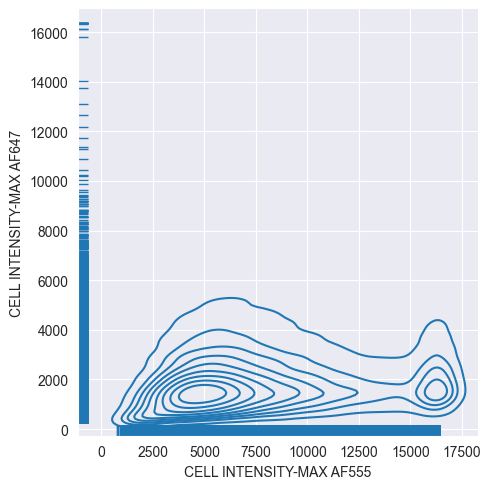

In [15]:
sb.displot(data=area_and_sytog_filtered, x="CELL INTENSITY-MAX AF555", y="CELL INTENSITY-MAX AF647", kind='kde', rug="True")

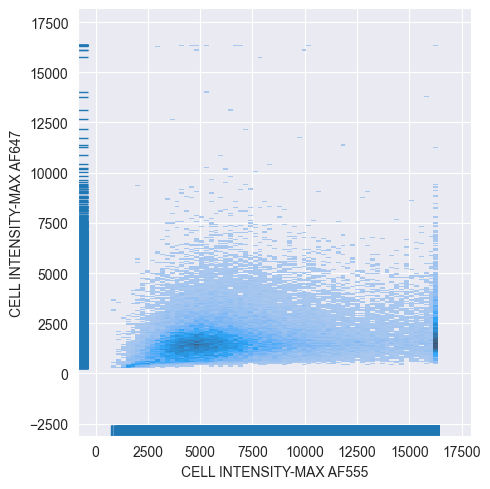

In [16]:
sb.displot(data=area_and_sytog_filtered, x="CELL INTENSITY-MAX AF555", y="CELL INTENSITY-MAX AF647", rug="True")

In [65]:
define_thresholds(area_and_sytog_filtered, variable='CELL INTENSITY-MEDIAN AF555')

interactive(children=(FloatRangeSlider(value=(352.0, 16383.0), continuous_update=False, description='Threshold…

(-10000000000.0, 10000000000.0)

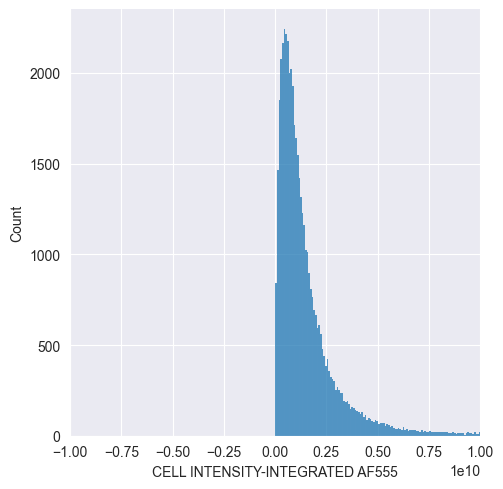

In [40]:
sb.displot(data=area_and_sytog_filtered['CELL INTENSITY-INTEGRATED AF555'])
#plt.xscale('log')
plt.xlim(-1e10, 1e10)

In [50]:
(area_and_sytog_filtered['CELL INTENSITY-INTEGRATED AF555'] > 0.45e10).sum()

4199

In [72]:
(area_and_sytog_filtered['CELL INTENSITY-MEDIAN AF555'] > 3200).sum()

4690

In [ ]:
print(area_and_sytog_filtered['CELL INTENSITY-MAX AF555'].max() == globals()['CELL INTENSITY-MAX AF555'][1])
print(globals()['CELL INTENSITY-MAX AF555'])

In [82]:
strong_555_positive = subset_dataframe_by_thresholds(area_and_sytog_filtered, 'CELL INTENSITY-MAX AF555')

strong_555_positive = area_and_sytog_filtered.loc[area_and_sytog_filtered.loc[:, 'CELL INTENSITY-INTEGRATED AF555'] > 0.45e10]

In [83]:
strong_555_positive

,il id,series,path,name,type,plate,well,well_row,well_column,timepoint,...,CELL WINDOWED-INTENSITY-STDDEV AF647,CELL WINDOWED-INTENSITY-STDDEV SYTOG,REGION COMBINED Region 1,REGION COMBINED Region 4,REGION COMBINED Region 5,REGION COMBINED Region 2,REGION COMBINED Region 3,rowid,il id.2,Unnamed: 230
60907,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.164925,0.092661,0,0.0,0.0,0,1.0,60910.0,91.0,NaN
60932,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.173268,0.099368,0,0.0,0.0,0,1.0,60935.0,91.0,NaN
60951,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.140380,0.057854,0,0.0,0.0,0,1.0,60954.0,91.0,NaN
61000,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.072057,0.113374,0,0.0,0.0,0,1.0,61003.0,91.0,NaN
61011,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.097846,0.158436,0,0.0,0.0,0,1.0,61014.0,91.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387163,601,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m299_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.104845,0.069963,0,0.0,0.0,0,1.0,387172.0,601.0,NaN
387229,601,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m299_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.098382,0.080570,0,0.0,0.0,0,1.0,387238.0,601.0,NaN
387234,601,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m299_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.241308,0.146797,0,0.0,0.0,0,1.0,387243.0,601.0,NaN
387339,602,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m399_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.297596,0.195664,0,0.0,0.0,0,1.0,387348.0,602.0,NaN


In [84]:
strong_555_positive = strong_555_positive['rowid'].to_list()

In [85]:
weak_555_negative = area_and_sytog_filtered.loc[area_and_sytog_filtered.loc[:, 'CELL INTENSITY-MAX AF555'] <= 5000]
weak_555_negative

,il id,series,path,name,type,plate,well,well_row,well_column,timepoint,...,CELL WINDOWED-INTENSITY-STDDEV AF647,CELL WINDOWED-INTENSITY-STDDEV SYTOG,REGION COMBINED Region 1,REGION COMBINED Region 4,REGION COMBINED Region 5,REGION COMBINED Region 2,REGION COMBINED Region 3,rowid,il id.2,Unnamed: 230
60777,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.031035,0.037397,0,0.0,0.0,0,1.0,60780.0,91.0,NaN
60782,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.074107,0.104306,0,0.0,0.0,0,1.0,60785.0,91.0,NaN
60783,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.112227,0.066198,0,0.0,0.0,0,1.0,60786.0,91.0,NaN
60788,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.131105,0.088524,0,0.0,0.0,0,1.0,60791.0,91.0,NaN
60797,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.047657,0.040388,0,0.0,0.0,0,1.0,60800.0,91.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387400,602,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m399_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.050466,0.226810,0,0.0,0.0,0,1.0,387409.0,602.0,NaN
387402,602,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m399_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.082055,0.121275,0,0.0,0.0,0,1.0,387411.0,602.0,NaN
387403,602,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m399_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.043846,0.154746,0,0.0,0.0,0,1.0,387412.0,602.0,NaN
387404,602,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m399_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.042914,0.144523,0,0.0,0.0,0,1.0,387413.0,602.0,NaN


In [86]:
weak_555_negative = weak_555_negative['rowid'].to_list()

In [ ]:
strong_555_positive

In [78]:
from copy import deepcopy
strong_555_positive_copy = deepcopy(strong_555_positive)
weak_555_negative_copy = deepcopy(weak_555_negative)

In [ ]:
len(strong_555_positive)

In [ ]:
x = 22

In [ ]:
from random import shuffle

In [87]:
from copy import deepcopy
from random import shuffle

strong_555_positive_copy = deepcopy(strong_555_positive)
weak_555_negative_copy = deepcopy(weak_555_negative)
shuffle(strong_555_positive_copy)
shuffle(weak_555_negative_copy)

print('length strong_555_positive_copy', len(strong_555_positive_copy))
print('length weak_555_negative_copy', len(weak_555_negative_copy))

subset_dict = {'strong_555_pos': [], 'weak_555_neg': []}

start_val = 700
reps = 3
groups = 5

for g in range(groups):
    for r in range(reps):
        alist = []
        entry = 'g'+str(g)+str('_r')+str(r)
        for i in range(start_val):
            alist.append(int(strong_555_positive_copy.pop()))
        subset_dict['strong_555_pos'].append(alist)
    start_val = int(start_val/2)

start_val = 700
reps = 3
groups = 5

for g in range(groups):
    for r in range(reps):
        alist = []
        entry = 'g'+str(g)+str('_r')+str(r)
        for i in range(start_val):
            alist.append(int(weak_555_negative_copy.pop()))
        subset_dict['weak_555_neg'].append(alist)
    start_val = int(start_val/2)

length strong_555_positive_copy 4199
length weak_555_negative_copy 16636


In [88]:
for l in subset_dict['strong_555_pos']:
    print(len(l))
    
print(len(strong_555_positive_copy))

700
700
700
350
350
350
175
175
175
87
87
87
43
43
43
134


In [89]:
pretext = "SELECT \'Item lists\'.\'il id\', \'Item lists\'.\'series\', \'Item lists\'.\'path\', \'Item lists\'.\'name\', \'Item lists\'.\'type\', \'Item lists\'.\'plate\', \'Item lists\'.\'well\', \'SectionRegions\'.\'rowid\', \'SectionRegions\'.\'item id\', \'SectionRegions\'.\'fm id\', \'SectionRegions\'.\'il id\'\nFROM \'SectionRegions\'\nINNER JOIN \'Item lists\' ON \'Item lists\'.\'il id\' = \'SectionRegions\'.\'il id\'\nWHERE "

for k,v in subset_dict.items():
   for i,ind in enumerate(v):
       if len(ind)>0:
           outtext = pretext + ''.join(["\'SectionRegions\'.\'rowid\' = \'{}\' OR ".format(x) for x in subset_dict[k][i]])
           sql_out = outtext.rstrip(' OR ')
           outname = '/Users/onurserce/MPIB/20240125_MPIB_15um/{}_{}_{}_sqlQuery.sql'.format(k,i,len(ind))
           with open(outname, 'w') as f:
               f.write(sql_out)



Have sent the output SQL files to Edwin on 14.03.2024. We'll meet next week on Tuesday and Wednesday to deal with the LMD and start cutting.

- Need to prioritize mask matching (Pia's code)
- Remind Edwin to look for the slide (tomorrow morning and also on Monday)

My conclusion:

Not enough cFOS positive cells (at least within the Region 3).

Ok, so the alternative is to make the titration curve from cells that are not cFOS positive (since we have a ton), and then just make a triplicate from the top X cFOS positive cells (X has to be a number that is in the titration curve, so that I can compare the data by)

In [110]:
area_and_sytog_filtered_sorted = area_and_sytog_filtered.sort_values(['CELL INTENSITY-INTEGRATED AF555'], ascending=False)

<Axes: xlabel='CELL INTENSITY-INTEGRATED AF555', ylabel='CELL AREA'>

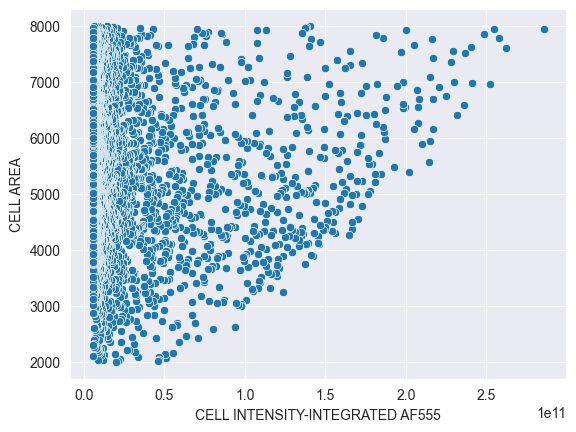

In [115]:
sb.scatterplot(data=area_and_sytog_filtered_sorted[:3000], x='CELL INTENSITY-INTEGRATED AF555', y='CELL AREA')

In [124]:
area_and_sytog_filtered_sorted_AF555_top3000 = area_and_sytog_filtered_sorted[:3000]
area_and_sytog_filtered_sorted_AF555_top3000

,il id,series,path,name,type,plate,well,well_row,well_column,timepoint,...,CELL WINDOWED-INTENSITY-STDDEV AF647,CELL WINDOWED-INTENSITY-STDDEV SYTOG,REGION COMBINED Region 1,REGION COMBINED Region 4,REGION COMBINED Region 5,REGION COMBINED Region 2,REGION COMBINED Region 3,rowid,il id.2,Unnamed: 230
114412,171,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m351_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.292245,0.143465,0,0.0,0.0,0,1.0,114415.0,171.0,NaN
159019,238,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m382_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.241130,0.099707,0,0.0,0.0,0,1.0,159022.0,238.0,NaN
367275,568,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m339_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.126649,0.121222,0,0.0,0.0,0,1.0,367282.0,568.0,NaN
371142,574,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m349_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.062442,0.115606,0,0.0,0.0,0,1.0,371149.0,574.0,NaN
297986,461,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m337_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.110366,0.104415,0,0.0,0.0,0,1.0,297993.0,461.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383533,597,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m389_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.315752,0.072754,0,0.0,0.0,0,1.0,383542.0,597.0,NaN
274794,420,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m356_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.132812,0.084052,0,0.0,0.0,0,1.0,274801.0,420.0,NaN
174596,264,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m333_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.039590,0.043385,0,0.0,0.0,0,1.0,174599.0,264.0,NaN
219022,335,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m374_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.045172,0.202989,0,0.0,0.0,0,1.0,219027.0,335.0,NaN


In [122]:
from scipy.stats import pearsonr

pearsonr(x=area_and_sytog_filtered_sorted_top3000['CELL INTENSITY-INTEGRATED AF555'],
         y=area_and_sytog_filtered_sorted_top3000['CELL AREA'],
         alternative='two-sided', method=None)

PearsonRResult(statistic=-0.0011585467694318454, pvalue=0.9494242611767699)

In [123]:
pearsonr(x=subdf['CELL INTENSITY-INTEGRATED AF555'],
         y=subdf['CELL AREA'],
         alternative='two-sided', method=None)

PearsonRResult(statistic=0.18039581271694313, pvalue=0.0)

In [137]:
subdf['CELL AREA'].quantile(0.98)

10581.300000000003

In [138]:
subdf['CELL AREA'].quantile(0.98)

10581.300000000003

In [139]:
subdf['CELL INTENSITY-INTEGRATED AF555'].quantile(0.98)

14446116454.400043

In [184]:
selected = subdf.loc[(subdf['CELL INTENSITY-INTEGRATED AF555'] > 14446116454) & (subdf['CELL AREA'].between(3307, 10581))]
selected

,il id,series,path,name,type,plate,well,well_row,well_column,timepoint,...,CELL WINDOWED-INTENSITY-STDDEV AF647,CELL WINDOWED-INTENSITY-STDDEV SYTOG,REGION COMBINED Region 1,REGION COMBINED Region 4,REGION COMBINED Region 5,REGION COMBINED Region 2,REGION COMBINED Region 3,rowid,il id.2,Unnamed: 230
60932,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.173268,0.099368,0,0.0,0.0,0,1.0,60935.0,91.0,NaN
60951,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.140380,0.057854,0,0.0,0.0,0,1.0,60954.0,91.0,NaN
61000,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.072057,0.113374,0,0.0,0.0,0,1.0,61003.0,91.0,NaN
61208,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.231407,0.111357,0,0.0,0.0,0,1.0,61211.0,91.0,NaN
61347,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.130253,0.137259,0,0.0,0.0,0,1.0,61350.0,91.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386850,601,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m299_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.112668,0.130737,0,0.0,0.0,0,1.0,386859.0,601.0,NaN
386944,601,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m299_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.155744,0.121143,0,0.0,0.0,0,1.0,386953.0,601.0,NaN
387087,601,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m299_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.056135,0.151583,0,0.0,0.0,0,1.0,387096.0,601.0,NaN
387107,601,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m299_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.097198,0.101589,0,0.0,0.0,0,1.0,387116.0,601.0,NaN


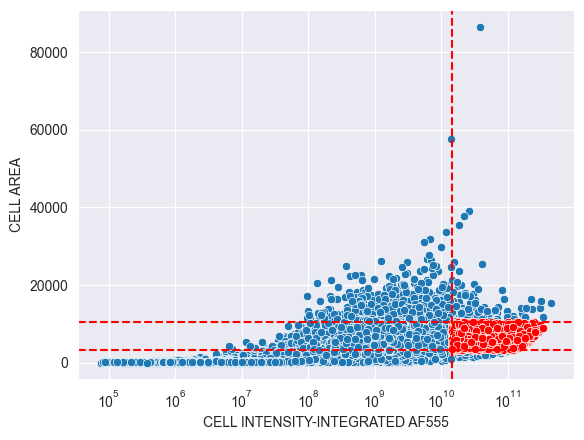

In [189]:
sb.scatterplot(data=subdf, x='CELL INTENSITY-INTEGRATED AF555', y='CELL AREA')
sb.scatterplot(data=selected, x='CELL INTENSITY-INTEGRATED AF555', y='CELL AREA', color='r')

plt.axhline(y=10581, linestyle='--', c='r')
plt.axhline(y=3307, linestyle='--', c='r')
plt.axvline(x=14446116454, linestyle='--', c='r')

plt.xscale('log')

In [194]:
selected.to_csv('/Users/onurserce/MPIB/20240125_MPIB_15um/selected_555_positive.csv', index=True)

In [202]:
define_thresholds(subdf, 'CELL INTENSITY-MEAN AF555')

interactive(children=(FloatRangeSlider(value=(314.0, 15331.0), continuous_update=False, description='Threshold…

In [209]:
af555_negative = subdf.loc[(subdf['CELL INTENSITY-INTEGRATED AF555'] < 1e9) & (subdf['CELL AREA'].between(3307, 10581) & (subdf['CELL INTENSITY-MEAN AF555'] < 4000))]
af555_negative.to_csv('/Users/onurserce/MPIB/20240125_MPIB_15um/af555_negative.csv', index=True)
af555_negative

,il id,series,path,name,type,plate,well,well_row,well_column,timepoint,...,CELL WINDOWED-INTENSITY-STDDEV AF647,CELL WINDOWED-INTENSITY-STDDEV SYTOG,REGION COMBINED Region 1,REGION COMBINED Region 4,REGION COMBINED Region 5,REGION COMBINED Region 2,REGION COMBINED Region 3,rowid,il id.2,Unnamed: 230
60779,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.133397,0.099521,0,0.0,0.0,0,1.0,60782.0,91.0,NaN
60781,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.052654,0.071948,0,0.0,0.0,0,1.0,60784.0,91.0,NaN
60783,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.112227,0.066198,0,0.0,0.0,0,1.0,60786.0,91.0,NaN
60790,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,-0.011154,0.007132,0,0.0,0.0,0,1.0,60793.0,91.0,NaN
60797,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.047657,0.040388,0,0.0,0.0,0,1.0,60800.0,91.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387400,602,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m399_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.050466,0.226810,0,0.0,0.0,0,1.0,387409.0,602.0,NaN
387402,602,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m399_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.082055,0.121275,0,0.0,0.0,0,1.0,387411.0,602.0,NaN
387403,602,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m399_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.043846,0.154746,0,0.0,0.0,0,1.0,387412.0,602.0,NaN
387404,602,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m399_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.042914,0.144523,0,0.0,0.0,0,1.0,387413.0,602.0,NaN


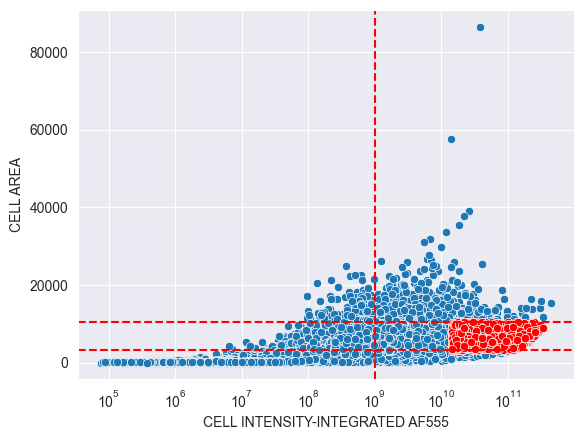

In [205]:
sb.scatterplot(data=subdf, x='CELL INTENSITY-INTEGRATED AF555', y='CELL AREA')
sb.scatterplot(data=selected, x='CELL INTENSITY-INTEGRATED AF555', y='CELL AREA', color='r')

plt.axhline(y=10581, linestyle='--', c='r')
plt.axhline(y=3307, linestyle='--', c='r')
plt.axvline(x=1e9, linestyle='--', c='r')

plt.xscale('log')

In [215]:
strong_555_positive = selected['rowid'].to_list()
strong_555_negative = af555_negative['rowid'].to_list()

In [257]:
strong_555_positive_copy = deepcopy(strong_555_positive)
weak_555_negative_copy = deepcopy(weak_555_negative)
shuffle(strong_555_positive_copy)
shuffle(weak_555_negative_copy)

print('length strong_555_positive_copy', len(strong_555_positive_copy))
print('length weak_555_negative_copy', len(weak_555_negative_copy))

subset_dict = {'strong_555_pos': [], 'weak_555_neg': []}

start_val = 500
reps = 3
groups = 1

for g in range(groups):
    for r in range(reps):
        alist = []
        entry = 'g'+str(g)+str('_r')+str(r)
        for i in range(start_val):
            alist.append(int(strong_555_positive_copy.pop()))
        subset_dict['strong_555_pos'].append(alist)
    start_val = int(start_val/2)

print('length strong_555_positive_copy', len(strong_555_positive_copy))
print('length weak_555_negative_copy', len(weak_555_negative_copy))

length strong_555_positive_copy 1500
length weak_555_negative_copy 16636
length strong_555_positive_copy 0
length weak_555_negative_copy 16636


In [258]:
reps = 3
groups = [2600, 1500, 750, 375, 150, 100, 50]

for g in groups:
    print(g)
    for r in range(reps):
        alist = []
        entry = 'g'+str(g)+str('_r')+str(r)
        for i in range(g):
            alist.append(int(weak_555_negative_copy.pop()))
        subset_dict['weak_555_neg'].append(alist)
    
print('length strong_555_positive_copy', len(strong_555_positive_copy))
print('length weak_555_negative_copy', len(weak_555_negative_copy))

2600
1500
750
375
150
100
50
length strong_555_positive_copy 0
length weak_555_negative_copy 61


In [261]:
pretext = "SELECT \'Item lists\'.\'il id\', \'Item lists\'.\'series\', \'Item lists\'.\'path\', \'Item lists\'.\'name\', \'Item lists\'.\'type\', \'Item lists\'.\'plate\', \'Item lists\'.\'well\', \'SectionRegions\'.\'rowid\', \'SectionRegions\'.\'item id\', \'SectionRegions\'.\'fm id\', \'SectionRegions\'.\'il id\'\nFROM \'SectionRegions\'\nINNER JOIN \'Item lists\' ON \'Item lists\'.\'il id\' = \'SectionRegions\'.\'il id\'\nWHERE "

for k,v in subset_dict.items():
   for i,ind in enumerate(v):
       if len(ind)>0:
           outtext = pretext + ''.join(["\'SectionRegions\'.\'rowid\' = \'{}\' OR ".format(x) for x in subset_dict[k][i]])
           sql_out = outtext.rstrip(' OR ')
           outname = '/Users/onurserce/MPIB/20240125_MPIB_15um/{}_{}_{}_sqlQuery.sql'.format(k,i,len(ind))
           with open(outname, 'w') as f:
               f.write(sql_out)

Sent the files to Edwin!